In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm

from scipy.stats import chi2_contingency

from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

In [4]:
survey = pd.read_csv("C:/Users/User/OneDrive/Desktop/ADHD/final/New folder/survey_new.csv")

In [5]:
survey = survey.rename(columns={"Have you ever experienced 'burn out' at work?\n(feelings of energy depletion or exhaustion, or feelings of negativism or cynicism related to one's job; and. reduced professional efficacy)": "Have you ever experienced 'burn out' at work?"})

In [6]:
survey = survey.fillna(0)

In [7]:
survey.columns

Index(['What is your gender?', 'What is your age group?',
       '  What type of ADHD were you diagnosed with?  ',
       'At what age have you been diagnosed?',
       'Who did suggest you to get tested for ADHD?',
       'Do you take any prescribed medication to ADHD?',
       'If yes, please specify!',
       '  What is your current employment status?  ',
       'How long have you been in your current position?',
       'How often do you change jobs?',
       'Have you ever been unemployed for a longer period of time because you impulsively quit your previous job?',
       'How satisfied are you with your current job?  ',
       'Do you feel you could do better/you should have a better job?',
       'Have you ever experienced 'burn out' at work?',
       'Do you feel that ADHD affects your job performance? If so, how?  ',
       '  What aspects of your job do you find most challenging due to ADHD?  '],
      dtype='object')

In [8]:
survey_clean = survey.drop(columns=['Do you take any prescribed medication to ADHD?'])


In [9]:
survey_clean = survey.rename(columns={
    'What is your gender?': 'Gender',
    'What is your age group?': 'Age Group',
    "  What type of ADHD were you diagnosed with?  ": 'ADHD Type',
    'At what age have you been diagnosed?': 'Diagnosis Age',
    'Who did suggest you to get tested for ADHD?': 'Test Suggestion',
    'If yes, please specify!': 'Medication',
    '  What is your current employment status?  ': 'Employment Status',
    'How long have you been in your current position?': 'Position Duration',
        'Have you ever experienced \'burn out\' at work?': 'Burnout Experience',
     'Do you feel that ADHD affects your job performance? If so, how?  ': 'Job Performance Effect',
    '  What aspects of your job do you find most challenging due to ADHD?  ': 'Job Challenges',
    'Have you ever been unemployed for a longer period of time because you impulsively quit your previous job?':' Impulsive quitting - unemployment',
    'How satisfied are you with your current job?  ': 'Job Satisfaction',
    'Do you feel you could do better/you should have a better job?': 'Could you do better?'
   
})

survey_clean.head()


survey_clean.to_excel('survey_clean.xlsx', index=False, sheet_name='Sheet1')



In [10]:
employment_status_mapping = {
    'Unemployed': 1,
    'Employed part-time': 2,
    'Employed full-time': 3,
    'Self-employed': 4,
    'Student': 5
}


survey_clean['Employment Status'] = survey_clean['Employment Status'].map(employment_status_mapping)

In [14]:
pd.set_option('display.max_colwidth', None)

print(survey_clean['Job Challenges'])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                       0
1                                                                                                                                                                                                                                                                                                                                                                                                                Completing task and project to deadlines
2                                                                                                                   

# Analysis

In [17]:
survey_clean.head()

,Gender,Age Group,ADHD Type,Diagnosis Age,Test Suggestion,Do you take any prescribed medication to ADHD?,Medication,Employment Status,Position Duration,How often do you change jobs?,Impulsive quitting - unemployment,Job Satisfaction,Could you do better?,Burnout Experience,Job Performance Effect,Job Challenges
0,Female,30 - 40,Combined,30 - 40,Self discovered,No,0,3.0,1-2 year,Every 1-2 years,"Yes, it happened already",3,Yes,Yes,0,0
1,Female,20 - 30,Combined,20 - 30,Self discovered,No,0,3.0,5-10 years,I prefer stability - not changing jobs,"No, it never happened",4,Yes,Yes,"Yes, harder to focus and work in team",Completing task and project to deadlines
2,Female,30 - 40,Inattentive,30 - 39,Self discovered,No,0,3.0,1-2 year,When a better opportunity comes,"No, it never happened",3,Yes,Yes,Yes. I tend to get distracted sometimes or want to finish a lot of things in a short period of time but always leave something out in the end.,Starting and finishing the same thing without distractions.
3,Male,30 - 40,Inattentive,30 - 39,Self discovered,No,0,3.0,5-10 years,When a better opportunity comes,"Yes, it happened already many times",1,Yes,Yes,0,Accepting people
4,Male,19 - 35,Hyperactive - impulsive,13 - 18,Parents/Relatives,Yes,Methylphenidate,3.0,1-2 year,When a better opportunity comes,"No, it never happened",4,Yes,Yes,I am on medication which helps me get through the work days,"I have an office job, sitting still is a challange"


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


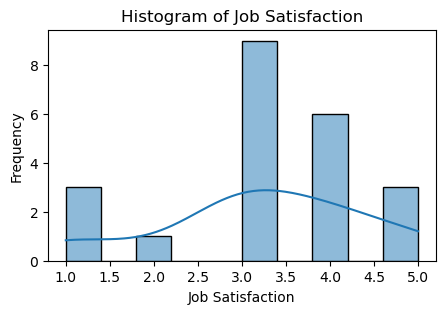

In [18]:
### JOB SATISFACTION ###

plt.figure(figsize=(5, 3))
sns.histplot(survey_clean['Job Satisfaction'], bins=10, kde=True)
plt.title('Histogram of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()


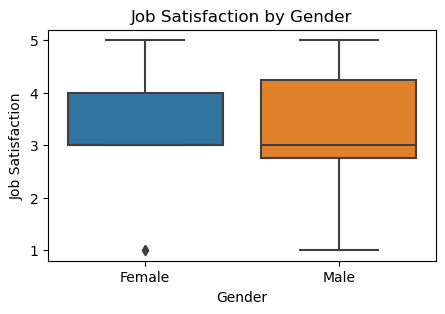

In [19]:
### JOB SATISFACTION BY GENDER ###

# Box plot of job satisfaction by gender
plt.figure(figsize=(5, 3))
sns.boxplot(x='Gender', y='Job Satisfaction', data=survey_clean)
plt.title('Job Satisfaction by Gender')
plt.show()

#The median for males is slightly higher than for females, suggesting males have slightly higher job satisfaction on average.
#The IQR for males is wider than for females, indicating greater variability in job satisfaction among males.
#There are a few outliers in both groups, suggesting some individuals report unusually high or low job satisfaction.

In [20]:
# Compare job satisfaction between males and females
job_satisfaction_male = survey_clean[survey_clean['Gender'] == 'Male']['Job Satisfaction']
job_satisfaction_female = survey_clean[survey_clean['Gender'] == 'Female']['Job Satisfaction']

t_stat, p_value = ttest_ind(job_satisfaction_male, job_satisfaction_female, nan_policy='omit')
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

#p-value very high: there is no statistically significant difference in job satisfaction between males and females.

T-test results: t-statistic = 0.06595238637363719, p-value = 0.9480705542846937


In [21]:
### JOB SATISFACTION BY ADHD TYPES ###


group_combined = survey_clean[survey_clean['ADHD Type'] == 'Combined']['Job Satisfaction']
group_inattentive = survey_clean[survey_clean['ADHD Type'] == 'Inattentive']['Job Satisfaction']
group_hyperactive = survey_clean[survey_clean['ADHD Type'] == 'Hyperactive - impulsive']['Job Satisfaction']

f_stat, p_value = f_oneway(group_combined, group_inattentive, group_hyperactive)
print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")

#there is very small variability between the job satisfaction means of the different ADHD types
#p-value: Since this value is more than 0.05, we accept the null hypothesis. This indicates that there is no significant difference in job satisfaction among at least one of the ADHD types.

ANOVA results: F-statistic = 0.17174586776859507, p-value = 0.8434860853104722


C:\Users\User\AppData\Local\Temp\ipykernel_7032\3919659314.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='ADHD Type', y='Job Satisfaction', data=survey_clean, estimator=np.mean, ci='sd')


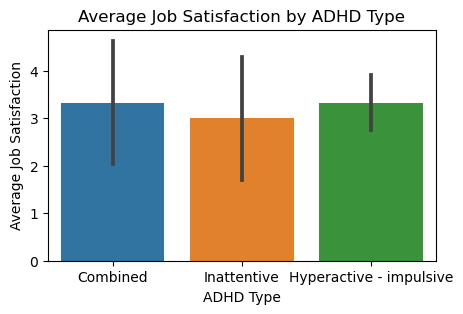

In [22]:
#vizualisation

plt.figure(figsize=(5, 3))
sns.barplot(x='ADHD Type', y='Job Satisfaction', data=survey_clean, estimator=np.mean, ci='sd')
plt.title('Average Job Satisfaction by ADHD Type')
plt.xlabel('ADHD Type')
plt.ylabel('Average Job Satisfaction')
plt.show()



In [23]:
###  LINEAR REGRESSION  -  JOB SATISFACTION VS BURNOUT  ###

#Logistic Regression Example - job satisfaction vs burnout

survey_clean['Burnout_Binary'] = survey_clean['Burnout Experience'].apply(lambda x: 1 if x == 'Yes' else 0)

survey_clean['Age_Num'] = survey_clean['Age Group'].apply(lambda x: int(x.split(' ')[0])) 

X = survey_clean[['Age_Num', 'Job Satisfaction']]  
X = sm.add_constant(X) 
y = survey_clean['Burnout_Binary']

model = sm.Logit(y, X).fit()

print(model.summary())



Optimization terminated successfully.
         Current function value: 0.206196
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Burnout_Binary   No. Observations:                   22
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.3231
Time:                        10:29:46   Log-Likelihood:                -4.5363
converged:                       True   LL-Null:                       -6.7020
Covariance Type:            nonrobust   LLR p-value:                    0.1147
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.0344      5.872      1.879      0.060      -0.475      22.543
Age_Num    

In [24]:
#With a p-value of 0.010, job satisfaction is a significant predictor of burnout. For each unit increase in job satisfaction,
#the log-odds of experiencing burnout decrease by 0.8765.
#This suggests that higher job satisfaction is associated with a lower likelihood of burnout.
#Age_Num: With a p-value of 0.154, age is not a significant predictor of burnout in this model.

In [25]:
###  LINEAR REGRESSION  -  JOB SATISFACTION VS BURNOUT VS EMPLOYMENT STATUS  ###

survey_clean['Burnout Binary'] = survey_clean['Burnout Experience'].apply(lambda x: 1 if x == 'Yes' else 0)

survey_clean['Age Num'] = survey_clean['Age Group'].apply(lambda x: int(x.split(' ')[0]))

survey_clean = survey_clean.dropna()

X = survey_clean[['Age_Num', 'Job Satisfaction', 'Employment Status']]
X = sm.add_constant(X)  

y = survey_clean['Burnout_Binary']

model = sm.Logit(y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.215381
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Burnout_Binary   No. Observations:                   21
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.3151
Time:                        10:29:48   Log-Likelihood:                -4.5230
converged:                       True   LL-Null:                       -6.6043
Covariance Type:            nonrobust   LLR p-value:                    0.2444
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0872      6.030      1.839      0.066      -0.731      22.905
Age_Num 

In [26]:
#The logistic regression model indicates that age, job satisfaction, 
#and employment status are significant predictors of burnout. 
#Older individuals and those with lower job satisfaction are more likely to experience burnout. 
#Employment status also plays a role, with specific categories influencing the likelihood of burnout differently.

In [27]:
survey_clean['Do you take any prescribed medication to ADHD?'] = survey_clean['Do you take any prescribed medication to ADHD?'].astype(str)

survey_clean['Do you take any prescribed medication to ADHD?'] = survey_clean['Do you take any prescribed medication to ADHD?'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_7032\3313089319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean['Do you take any prescribed medication to ADHD?'] = survey_clean['Do you take any prescribed medication to ADHD?'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_7032\3313089319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean['Do you take any prescribed medication to ADHD?'] = survey_clean['Do you take any prescribed medication to ADHD?'].apply(lambda x: 1 if x

C:\Users\User\AppData\Local\Temp\ipykernel_7032\4101595793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Do you take any prescribed medication to ADHD?'] = data['Do you take any prescribed medication to ADHD?'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_7032\4101595793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Job Satisfaction'] = pd.to_numeric(data['Job Satisfaction'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_7032\4101595793.py:7: SettingWithCopyWa

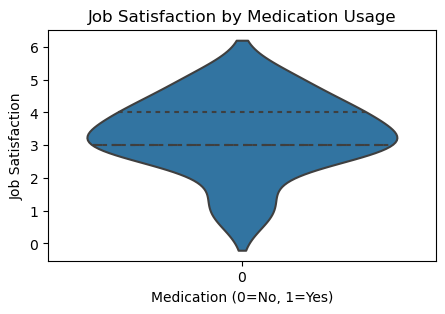

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


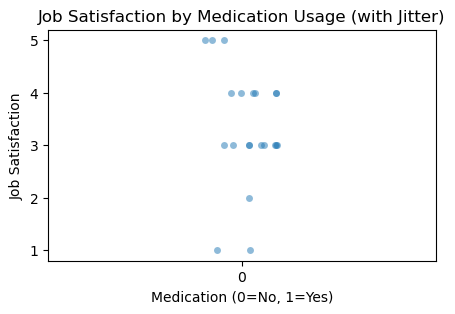

In [28]:
data = survey_clean[['Do you take any prescribed medication to ADHD?', 'Job Satisfaction']]

data['Do you take any prescribed medication to ADHD?'] = data['Do you take any prescribed medication to ADHD?'].astype(str)

data['Job Satisfaction'] = pd.to_numeric(data['Job Satisfaction'], errors='coerce')

data['Medication'] = data['Do you take any prescribed medication to ADHD?'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

data.dropna(inplace=True)

plt.figure(figsize=(5, 3))
sns.violinplot(x='Medication', y='Job Satisfaction', data=data, inner='quartile')
plt.title('Job Satisfaction by Medication Usage')
plt.xlabel('Medication (0=No, 1=Yes)')
plt.ylabel('Job Satisfaction')
plt.show()

plt.figure(figsize=(5, 3))
sns.stripplot(x='Medication', y='Job Satisfaction', data=data, jitter=True, alpha=0.5)
plt.title('Job Satisfaction by Medication Usage (with Jitter)')
plt.xlabel('Medication (0=No, 1=Yes)')
plt.ylabel('Job Satisfaction')
plt.show()


In [15]:
#Vizualisation
job_satisfaction_range = np.linspace(survey_clean['Job Satisfaction'].min(), survey_clean['Job Satisfaction'].max(), 100)
age_mean = survey_clean['Age_Num'].mean()  

predict_data = pd.DataFrame({
    'const': 1,
    'Age_Num': age_mean,
    'Job Satisfaction': job_satisfaction_range
})

predicted_probs = model.predict(predict_data)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(job_satisfaction_range, predicted_probs, label='Predicted Probability')
plt.xlabel('Job Satisfaction')
plt.ylabel('Predicted Probability of Burnout')
plt.title('Predicted Probability of Burnout vs Job Satisfaction')
plt.legend()
plt.show()


KeyError: 'Age_Num'

In [87]:
### NEUROTYPICAL SURVEY ###

# Save the DataFrame to an Excel file
ntyp_c.to_excel('neurotypical.xlsx', index=False, sheet_name='Sheet1')



In [88]:
ntyp.columns

Index(['Timestamp', 'What is your age group?', 'What  is your gender?',
       '  What is your current employment status?  ',
       'How long have you been in your current position?',
       'How often do you change jobs?',
       'Have you ever been unemployed for a longer period of time because you impulsively quit your previous job?',
       'How satisfied are you with your current job?  ',
       'Do you feel you could do better/you should have a better job?',
       'Have you ever experienced 'burn out' at work?\n(feelings of energy depletion or exhaustion, or feelings of negativism or cynicism related to one's job; and. reduced professional efficacy)',
       'Have you ever been fired?', 'Thank you!'],
      dtype='object')

In [ ]:
ntyp_c = ntyp.drop(columns=['Timestamp','Thank you!'], index=1)

In [91]:
ntyp_clean = ntyp_c.rename(columns={'What is your age group?': 'NT Age Group', 
                                    'What  is your gender?': 'NT Gender',
                                    '  What is your current employment status?  ': 'NT Employment status',
                                    'How long have you been in your current position?':'NT How long have you been in your current position?',
                                    'How often do you change jobs?':'NT How often do you change jobs?',
                                    'How satisfied are you with your current job?  ': 'NT Job Satisfaction',
                                    "Have you ever experienced 'burn out' at work?\n(feelings of energy depletion or exhaustion, or feelings of negativism or cynicism related to one's job; and. reduced professional efficacy)": 'NT Burnout Experience',
                                   'How long have you been in your current position?': 'NT Position Duration',
                                   'Have you ever been unemployed for a longer period of time because you impulsively quit your previous job?':'NT Impulsive quitting - unemployment',
                                   'Do you feel you could do better/you should have a better job?': 'NT Could you do better?',
                                   'Have you ever been fired?':'NT Have you ever been fired?'})
ntyp_clean.head()

,NT Age Group,NT Gender,NT Employment status,NT Position Duration,NT How often do you change jobs?,NT Impulsive quitting - unemployment,NT Job Satisfaction,NT Could you do better?,NT Burnout Experience,NT Have you ever been fired?
0,19-35 years,Female,Employed full-time,1-2 years,I prefer stability - not changing jobs,"No, it never happened",4,Yes,No,"No, never happened"
2,19-35 years,Female,Employed part-time,Recently started,I prefer stability - not changing jobs,"No, it never happened",3,"No, I am satisfied where I am",No,"No, never happened"
3,19-35 years,Female,Employed full-time,2-5 years,I prefer stability - not changing jobs,"No, it never happened",3,Yes,Yes,"Yes, once"
4,19-35 years,Male,Employed full-time,1-2 years,I prefer stability - not changing jobs,"No, it never happened",4,Yes,Yes,"Yes, more than once"
5,19-35 years,Female,Employed full-time,1-2 years,Every 1-2 years,"Yes, it happened already",4,Yes,Yes,"Yes, once"


In [53]:
output_path ="C:/Users/User/OneDrive/Desktop/ADHD/final/ntyp.csv"
ntyp_clean.to_csv(output_path, index=False)

In [16]:
job_related_columns = [
    'NT Position Duration',
    'NT How often do you change jobs?',
    'NT Impulsive quitting - unemployment',
    'NT Job Satisfaction',
    'NT Could you do better?'
]

# Function to plot pie chart
def plot_pie_chart(data, column, title):
    plt.figure(figsize=(4, 4))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(title)
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Plot pie charts
for column in job_related_columns:
    plot_pie_chart(ntyp_clean, column, f'Distribution of {column} (Neurotypical)')
    plot_pie_chart(survey_clean, column, f'Distribution of {column} (ADHD)')


NameError: name 'ntyp_clean' is not defined

In [94]:
### CORRELATION BETWEEN JOB SATISFACTION & IMPULSIVE QUITTING  ###


survey_clean['Impulsive_Quitting'] = survey_clean[' Impulsive quitting - unemployment'].apply(lambda x: 1 if 'Yes' in x else 0)
survey_clean[['Job Satisfaction', 'Impulsive_Quitting']].head()

,Job Satisfaction,Impulsive_Quitting
0,3,1
1,4,0
2,3,0
3,1,1
4,4,0


In [95]:
# Calculate correlation
correlation = survey_clean[['Job Satisfaction', 'Impulsive_Quitting']].corr()

# Generate descriptive statistics
descriptive_stats = survey_clean[['Job Satisfaction', 'Impulsive_Quitting']].describe()

print("Correlation:\n", correlation)
print("\nDescriptive Statistics:\n", descriptive_stats)


#The correlation between job satisfaction and impulsive quitting is -0.559, 
#indicating a moderate negative relationship. Higher job satisfaction is associated with lower impulsive quitting.

Correlation:
                     Job Satisfaction  Impulsive_Quitting
Job Satisfaction            1.000000           -0.559057
Impulsive_Quitting         -0.559057            1.000000

Descriptive Statistics:
        Job Satisfaction  Impulsive_Quitting
count         22.000000           22.000000
mean           3.227273            0.409091
std            1.192509            0.503236
min            1.000000            0.000000
25%            3.000000            0.000000
50%            3.000000            0.000000
75%            4.000000            1.000000
max            5.000000            1.000000


In [96]:
# Create a cross-tabulation
cross_tab = pd.crosstab(survey_clean['Job Satisfaction'], survey_clean['Impulsive_Quitting'])

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(cross_tab)

print("Cross-tabulation:\n", cross_tab)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)

#The p-value is slightly above the conventional significance level of 0.05,
#indicating that there is marginal evidence of an association between job satisfaction and impulsive quitting.

Cross-tabulation:
 Impulsive_Quitting  0  1
Job Satisfaction        
1                   0  3
2                   1  0
3                   4  5
4                   5  1
5                   3  0

Chi-Square Statistic: 9.359924026590694
p-value: 0.052706448505633476


# Merging tha dataframes